# PREDICTING THE WINE QUALITY USING ID3 REGRESSION ALGORITHAM

The wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another critical factor in wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The wine market would be of interest if human quality of tasting can be related to wine's chemical properties so that certification and quality assessment and assurance processes are more controlled.
this project aims to determine which chemical features are the best quality red wine indicators. To be more specific, we define below problems for this analysis:
Show the contribution of each factor to the wine quality in our model
Show which features are more important in determining the wine quality
Show which features are less important in determining the wine quality As mentioned earlier, our target variable will be wine quality, which is scored between 0 and 10.


Variables of dataset (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 – chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density 9 - pH 
10 – sulphates
11 - alcohol Output variable (based on sensory data)
12 - quality (score between 0 and 10)


# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler


In [2]:
# READING THE DATA

In [3]:
data = pd.read_csv("winequalityN.csv")

In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.shape

(6497, 13)

In [7]:
# EXPLORATORY DATA ANALYSIS

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
# CHECKING THE NULL VALUES
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
num_col = data.select_dtypes(include=['float64','int64','object']).columns

In [11]:
# IMPUTING THE NULL FALUES WITH THE MEAN
data1 = data[num_col].fillna(data[num_col].mean())

In [12]:
data1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
data1.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
# COVERTING CATEGORICAL VARIABLE TO NUMERIC VARIABLE 
data2 = pd.get_dummies(data1, columns = ['type'])
data2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_red                  uint8
type_white                uint8
dtype: object

In [15]:
 data3 = data2.drop('type_white',axis=1)

In [16]:
data3.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_red                  uint8
dtype: object

In [17]:
data3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,0.246114
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [18]:
# CHECKING  THE OUTLIERS OF THE DATA USING BOXPLOTS

In [19]:
numcols= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','pH','alcohol','quality','type_red']


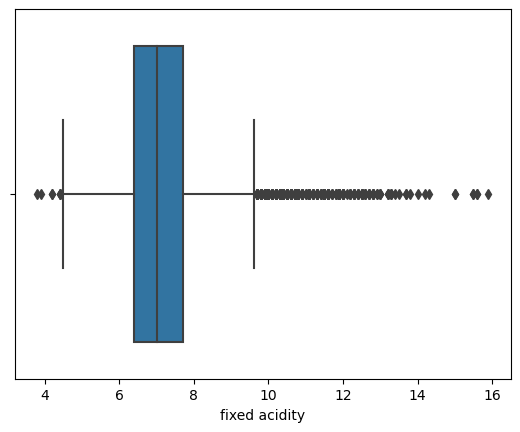

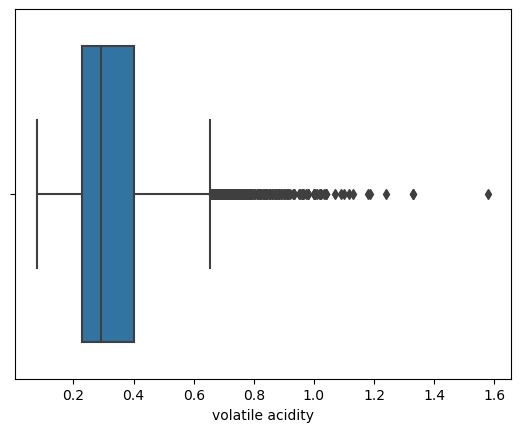

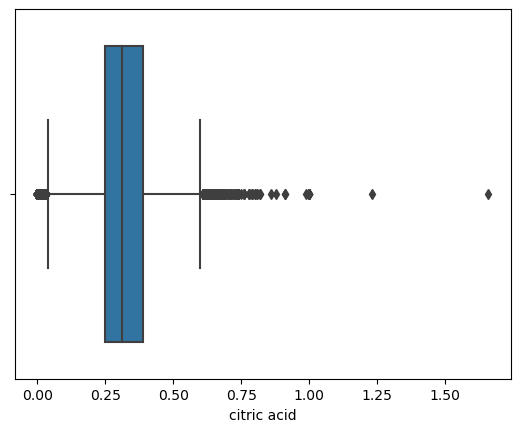

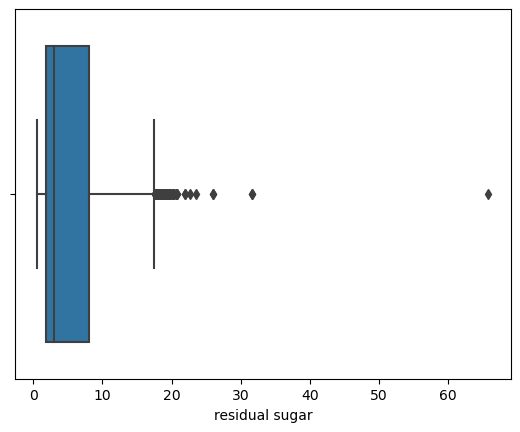

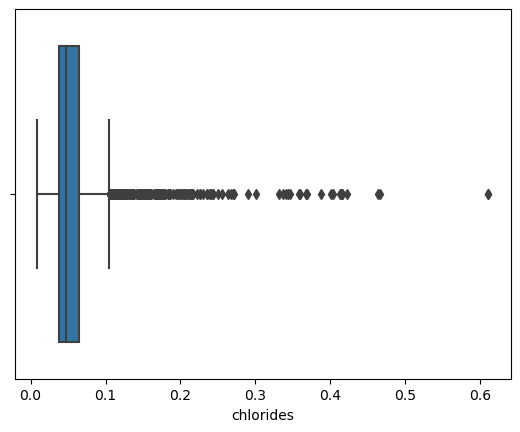

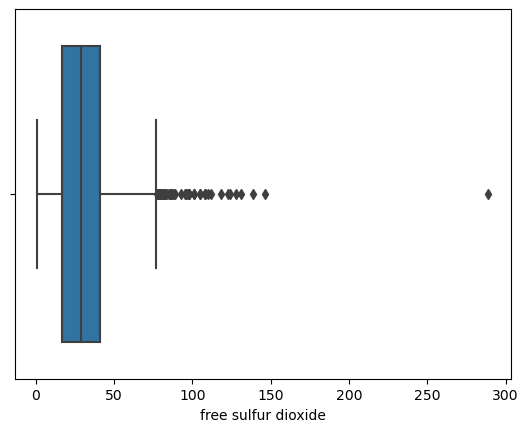

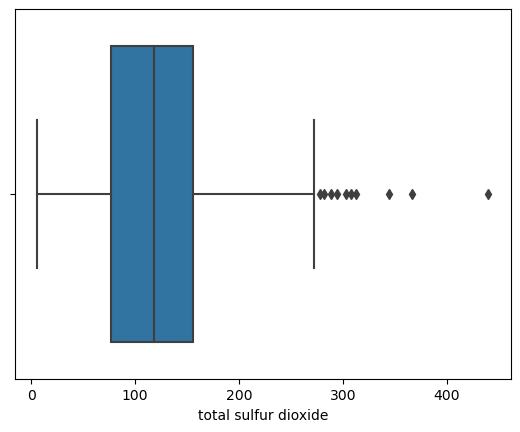

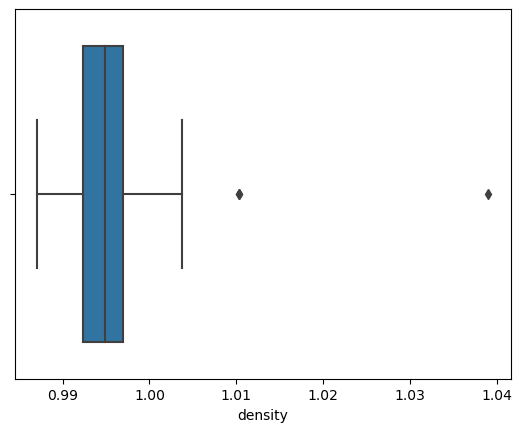

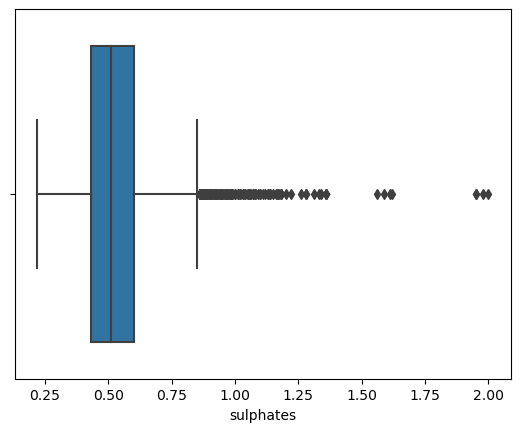

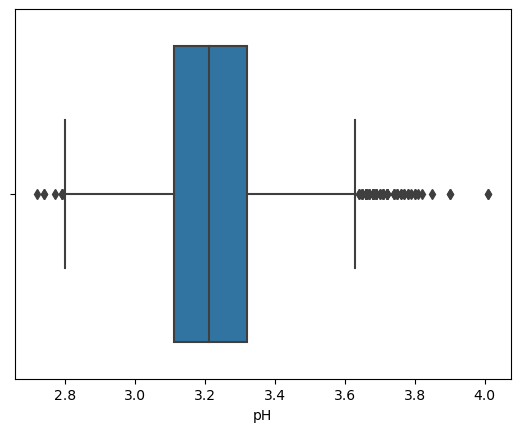

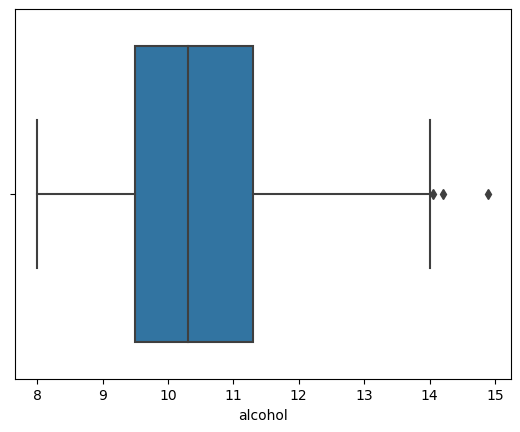

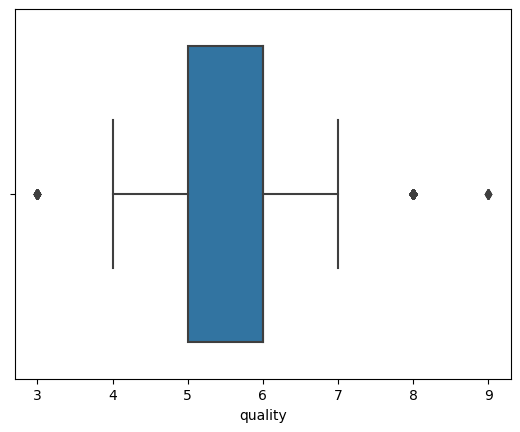

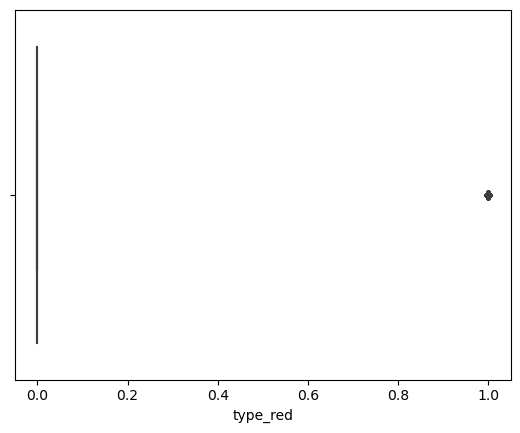

In [20]:
for i in numcols:
  sns.boxplot(data3[i])
  plt.show()


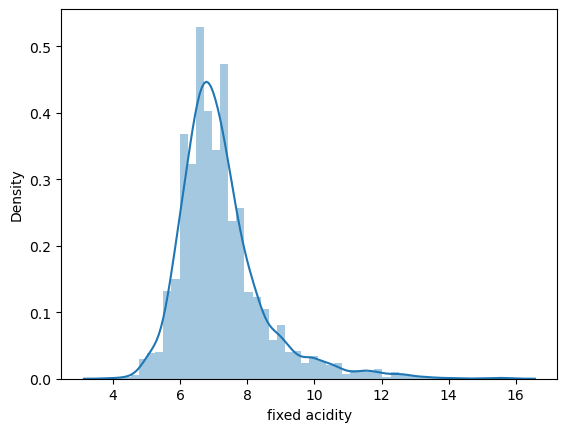

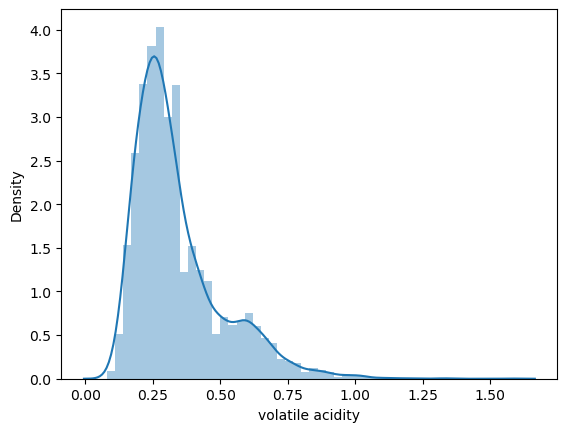

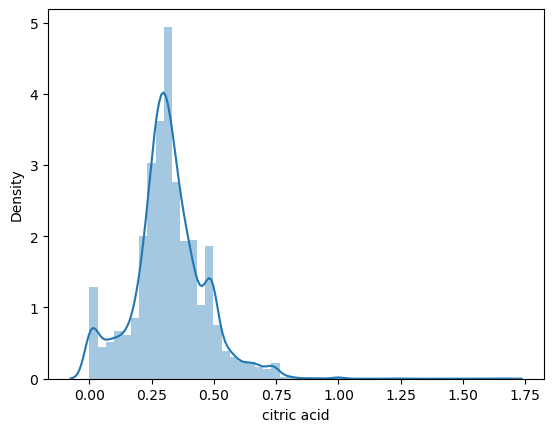

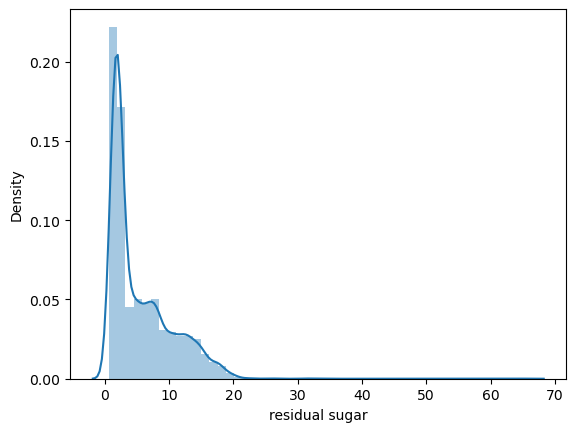

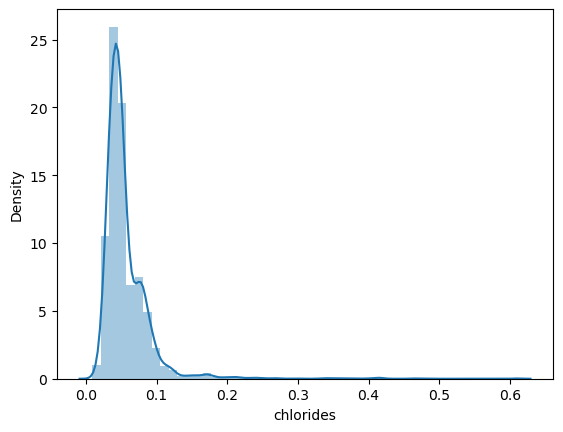

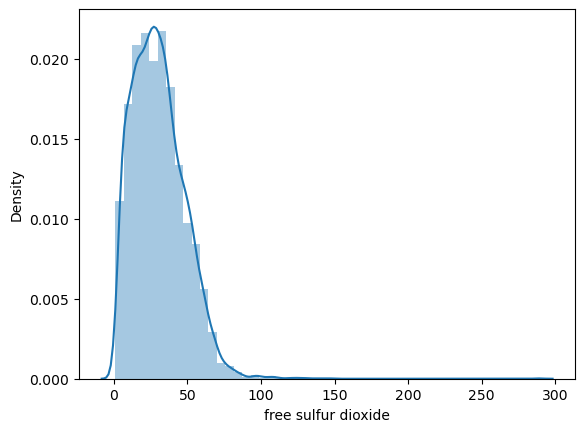

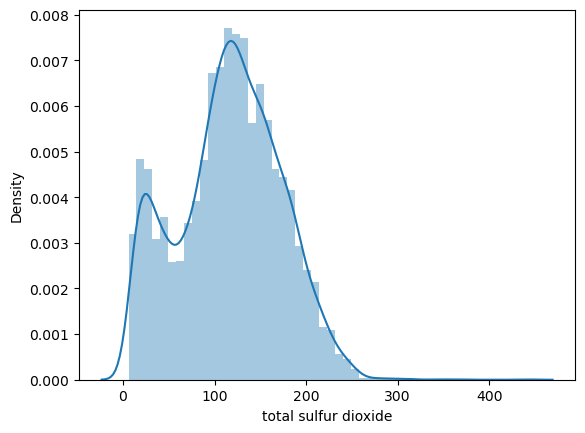

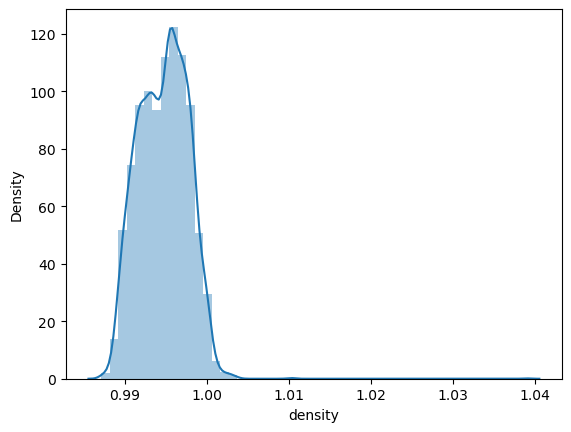

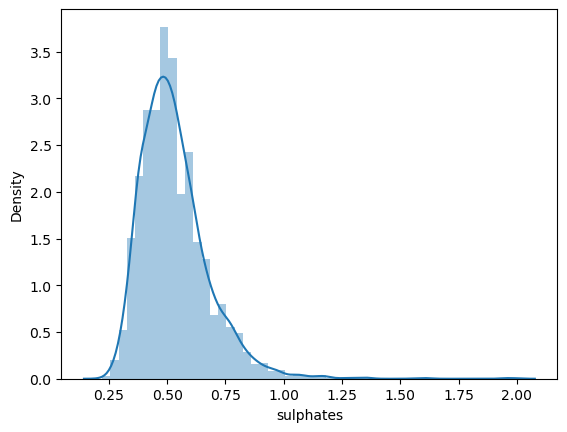

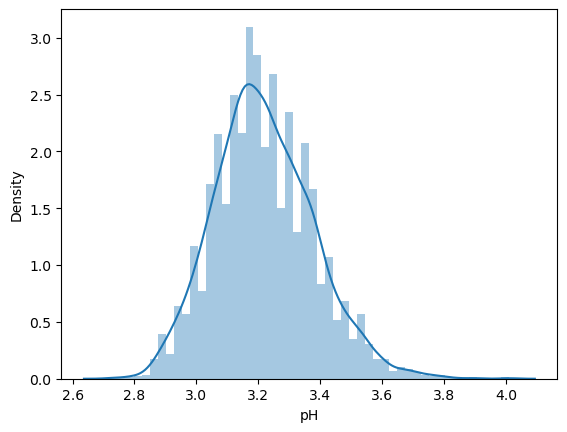

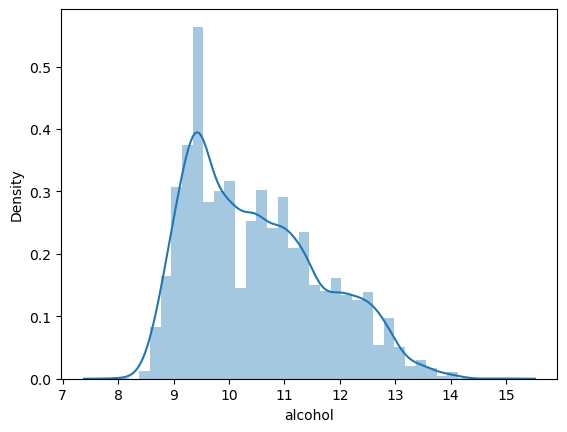

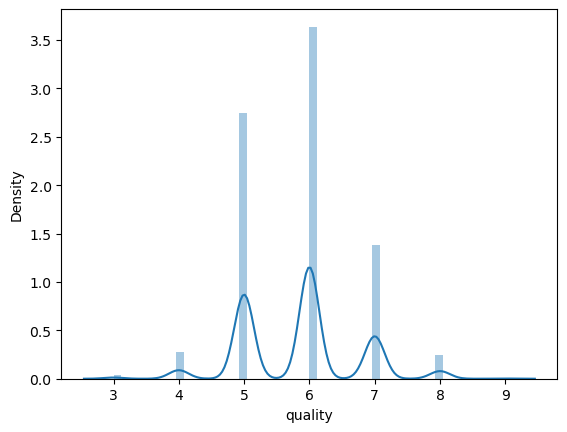

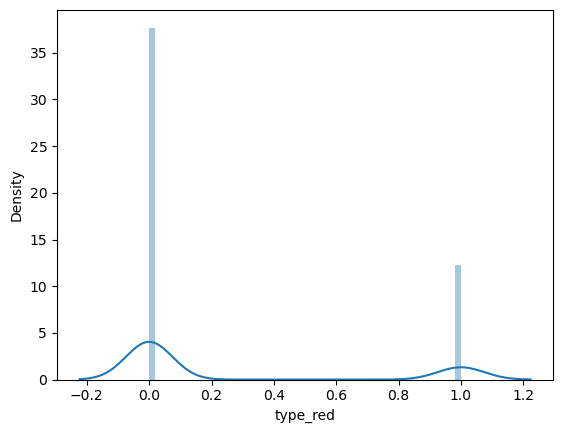

In [21]:
for i in numcols:
    sns.distplot(data3[i])
    plt.show()
    

In [22]:
for i in numcols:
  Q1 = data3[i].quantile(0.25)
  Q3 = data3[i].quantile(0.75)
  IQR  = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR 
  upper_limit = Q3 + 1.5 * IQR
  data4 = data3[~((data3.loc[:,[i]] < lower_limit) | (data3.loc[:,[i]] > upper_limit)).any(axis=1)]
data4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red
0,7.0,0.270000,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210000,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.320000,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.339691,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.290000,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [23]:
#TRANFORMATION OF OUTLIERS USING LOG TRANSFORMATION TECHNIQUE
df =np.log(data3[data4.columns]+1)

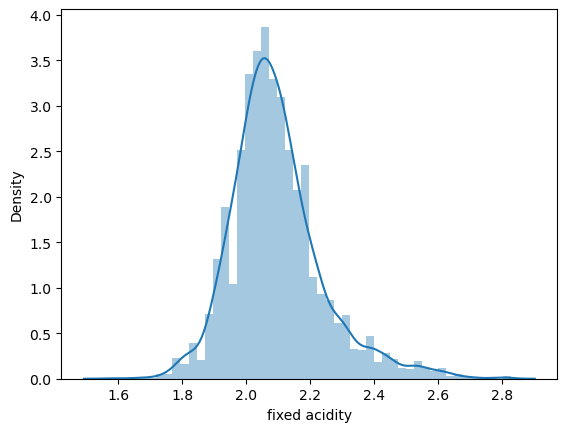

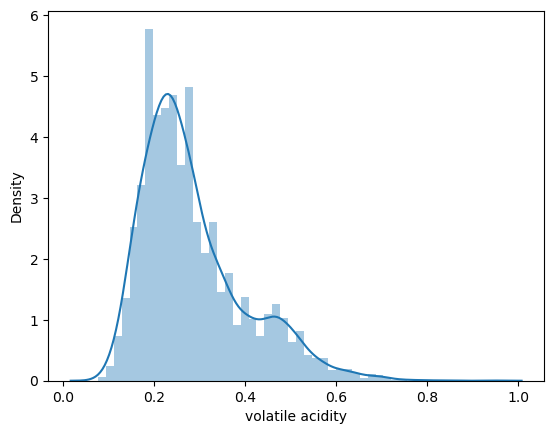

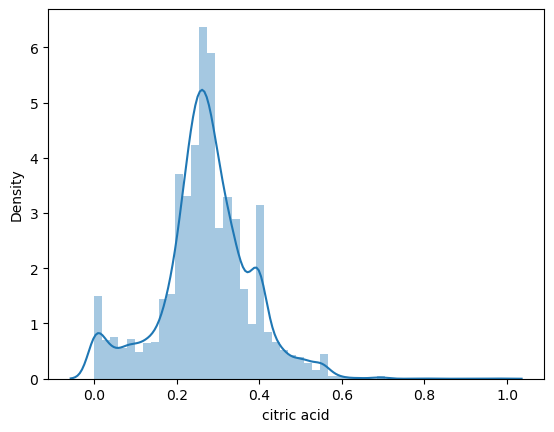

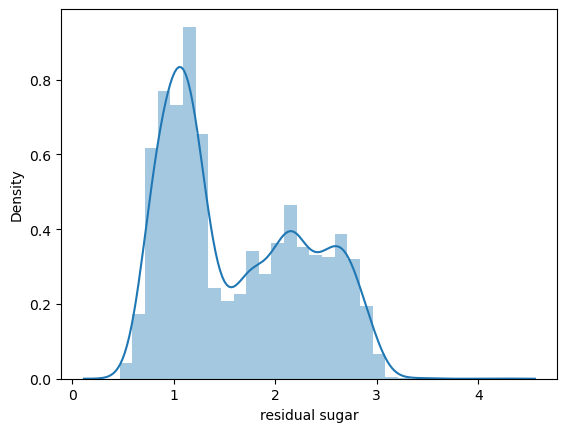

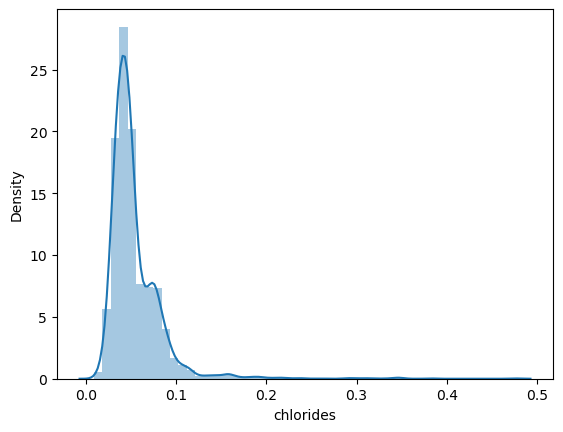

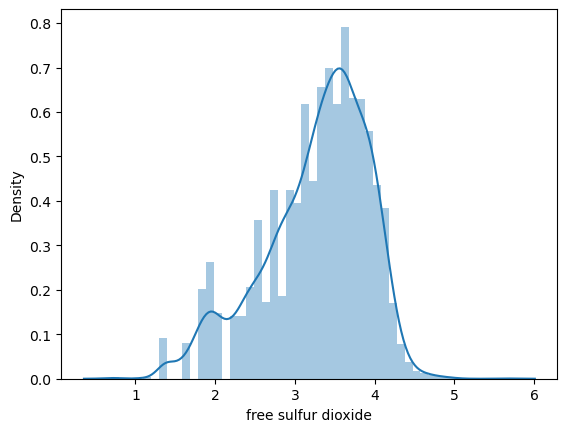

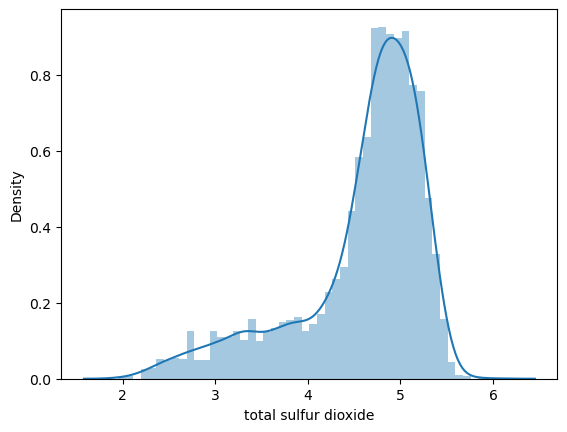

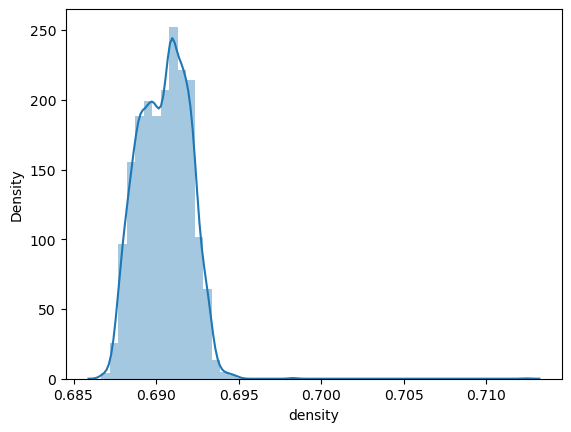

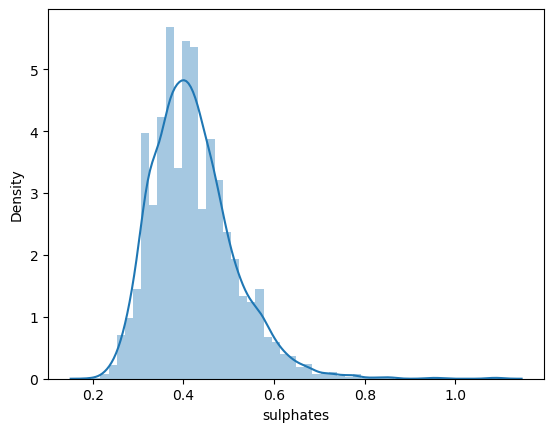

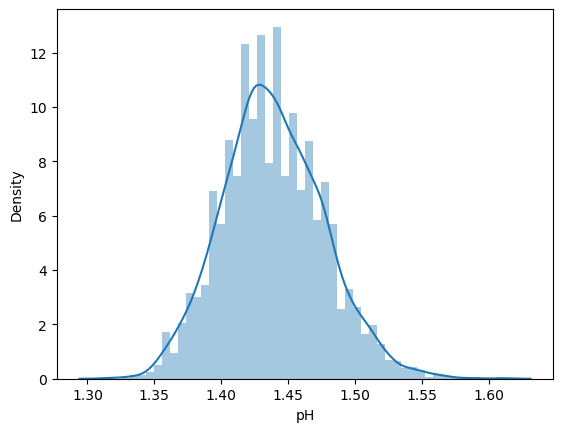

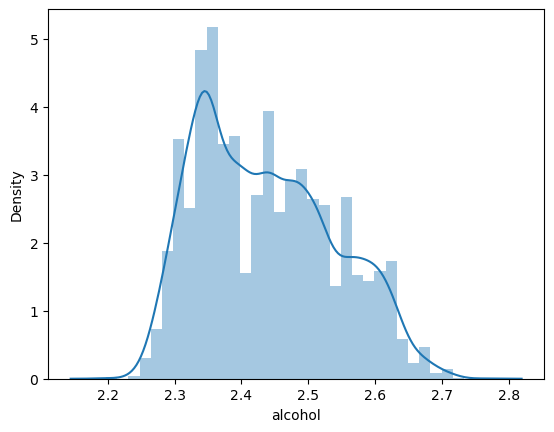

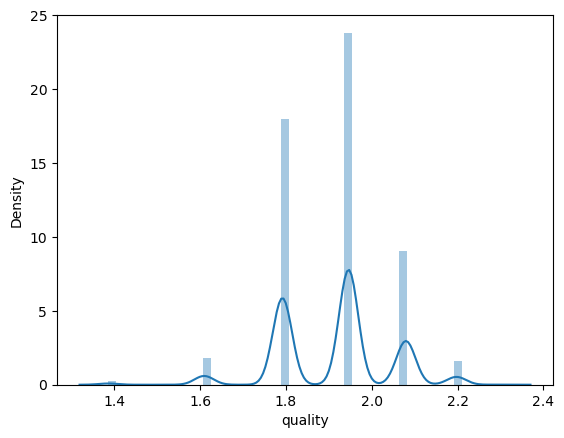

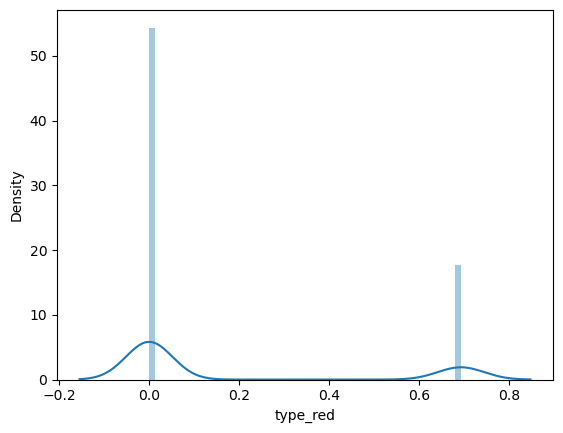

In [24]:
for i in numcols:
    sns.distplot(df[i])
    plt.show()
    

In [25]:
# STANDERDIZING THE DATA
scalar = StandardScaler()
scalar.fit_transform(data3[data3.columns])
#from sklearn.preprocessing import RobustScaler
#trans = RobustScaler()
#data5 = trans.fit_transform(data3)

array([[-0.1671586 , -0.4235636 ,  0.28424515, ..., -1.41855821,
         0.20799905, -0.57136659],
       [-0.70742728, -0.24123152,  0.14652315, ..., -0.83161516,
         0.20799905, -0.57136659],
       [ 0.68183504, -0.36278624,  0.55968916, ..., -0.32852111,
         0.20799905, -0.57136659],
       ...,
       [-0.70742728,  1.03509307, -1.2995579 , ...,  0.42611996,
         0.20799905,  1.75018984],
       [-1.01615224,  1.85558744, -1.3684189 , ..., -0.2446721 ,
        -0.93722961,  1.75018984],
       [-0.938971  , -0.18045416,  1.04171618, ...,  0.42611996,
         0.20799905,  1.75018984]])

In [26]:
df = pd.DataFrame(data5)

NameError: name 'data5' is not defined

In [ ]:
df.head()

In [ ]:
for i in numcols:
    sns.boxplot(data5[i])
    plt.show()

In [ ]:
# SEPRATING THE TARGET VARIABLE INTO X AND Y VARIABLES
x = data5.drop('quality', axis=1)
y = data5['quality']

In [ ]:
# SPLITTING THE DATA INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)

# MODEL BUILDING

In [ ]:
model = DecisionTreeRegressor(mi)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)                          

In [ ]:
train_acc =r2_score(y_train, train_pred)
test_acc= r2_score(y_test, test_pred)

In [ ]:
print('train acc :', train_acc)
print('test acc:', test_acc)

In [ ]:
print('mse',mean_squared_error(y_train,train_pred))
print('mse',mean_squared_error(y_test,test_pred))


In [ ]:
 from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :[ 'mse']
             }
param_grid2 = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11, 2)}

In [ ]:
GS_CV = GridSearchCV(estimator=model, param_grid=param_grid2, cv=5, verbose=True)
GS_CV.fit(X_train, y_train)

In [ ]:
train1_pred=GS_CV.predict(X_train)
test2_pred=GS_CV.predict(X_test)

In [ ]:
train1_acc =r2_score(y_train, train1_pred)
test1_acc= r2_score(y_test, test2_pred)

In [ ]:
print('train acc :', train1_acc)
print('test acc:', test1_acc)

In [ ]:
# AS THE TRAIN IS ERROR IS LOW AND TEST ERROR IS HIGH SO USING ENSEMBLE TECHNIQUE
reg= ExtraTreesRegressor(max_depth=20, random_state=42,max_features=12)

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
reg.feature_importances_


In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)


In [ ]:
reg_train =r2_score(y_train, y_train_pred)
reg_test= r2_score(y_test, y_test_pred)

In [ ]:
print('train acc :', reg_train)
print('test acc:', reg_test)

In [ ]:
print('mse',mean_squared_error(y_train_pred,train_pred))
print('mse',mean_squared_error(y_test_pred,test_pred))

In [ ]:
RDforest = RandomForestRegressor(n_estimators = 100, max_depth=20, min_samples_split=2, random_state = 0)

In [ ]:
RDforest.fit(X_train,y_train)

In [ ]:
y_RD = RDforest.predict(X_train)
y_test_RD = RDforest.predict(X_test)

In [ ]:
RD_train =r2_score(y_train, y_RD)
RD_test= r2_score(y_test, y_test_RD)

In [ ]:
print('train acc :', RD_train)
print('test acc:', RD_test)

In [ ]:
 from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :[ 'mse']
             }

In [ ]:
param_grid2 = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11, 2)}

In [ ]:
GS2_CV = GridSearchCV(estimator=RDforest, param_grid=param_grid2, cv=5, verbose=True)
GS2_CV.fit(X_train, y_train)

In [ ]:
train2_pred=GS2_CV.predict(X_train)
test3_pred=GS2_CV.predict(X_test)

In [ ]:
train2_acc =r2_score(y_train, train2_pred)
test2_acc= r2_score(y_test, test3_pred)

In [ ]:
print('train acc :', train2_acc)
print('test acc:', test2_acc)